In [41]:
%%HTML
<style>

.CodeMirror {
    width: 100vw;
}

.container {
    width: 80% !important;
}

.rendered_html {
  font-size:0.8em;
}
.rendered_html table, .rendered_html th, .rendered_html tr, .rendered_html td {
     font-size: 100%;
}

</style>

In [1]:
from pathlib import Path
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_validate

In [2]:
%matplotlib inline

In [3]:
def read_articles_as_df(root):
    root = Path(root)
    articles = []
    for p in data_dir.rglob("*.txt"):
        rel_path = p.relative_to(data_dir)
        tag = rel_path.parts[0]
        with open(p, encoding="utf8") as f:
            articles.append({"category": tag, "text": f.read()})
    return pd.DataFrame(articles)

# Gradient descent

You have some function *f* that you want to fit to some data points. When fitted, this function can be used to predict some dependent variable *y* given the values of some independent variables *x*, i.e. $y = f(x)$


<center><img src="images/linreg2.png" style="width: 500px;"/></center>

## The loss function

For this function you can define an loss function $J$ to evaluate the "fitness" of function/model. One such loss function is the mean squared error (MSE)

$$
MSE = \frac{1}{N} \sum_{(x,y)\in D} (y - prediction(x))^2
$$

<center><img src="images/mse.png" style="width: 700px;"/></center>

## Stepping towards the minimum of the loss function

- We want to improve the model, i.e. reduce the error, by changing the weights given to each variable
- To achieve this, find the gradient/partial derivative of the loss function $J$ with respect to the weights: $\triangledown_{w_i}J$
- Start from some random value and update the weights in the opposite direction of this gradient

$$
w_i \leftarrow w_i - \gamma * \triangledown_{w_i}J
$$

*Note $\gamma$ is some chosen constant step value*

<center><img src="images/gd.png" style="width: 600px;"/></center>

For MSE the derivative will be:

$$
\triangledown_{w_i}J = 2 * \sum_{(x,y) \in D}(prediction(x) - y)*x_i
$$

Which gives:

$$
\begin{align*}
w_i &\leftarrow w_i - \gamma * \triangledown_{w_i}J \\ 
    &= w_i - \gamma * 2 * \sum_{(x,y) \in D}(prediction(x) - y)*x_i \\
    &= w_i - \eta * \sum_{(x,y) \in D}(prediction(x) - y)*x_i
\end{align*}
$$

Intuitively this makes sense:
- prediction close to real value -> only a small change is needed
- e.g. the prediction is too high, and the value if $x_i$ is negative, weight *i* must be increased to get closer to the optimal value

## Gradient descent for regression

<center><img src="images/linreg.gif" style="width: 1000px;"></center>

## Gradient descent for classification 

- The procesdure is the same, the main difference is the loss function
- One common loss function is *log-loss*. Using this we would get a *logistic regression* model

<center><img src="images/logreg.gif" style="width: 800px;"></center>

# Step 1: read the data

In [14]:
df = read_articles_as_df("data/vg_nyheter")

In [28]:
df.sample(frac=1).head()

,category,text
3864,vær,Stengte fjelloverganger i sør\nEn rekke fjello...
2722,sjakk,Carlsen slo eks-verdensmesteren og er på god v...
1709,politikk,Støre etter krisemøte om Giske: – Vi tror på v...
3322,vær,Store snømengder flere steder i landet: – Dobb...
24,krim,Morgenoppdatering 12.03.18\n God morgen! Her e...


In [16]:
df.shape

(4400, 2)

## Category distribution

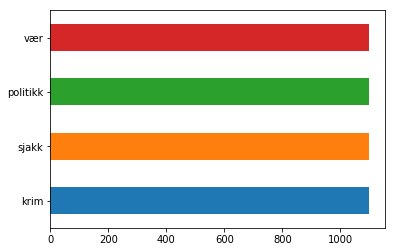

In [51]:
df.category.value_counts().plot.barh();

Percentage of articles with no text

In [26]:
f"{(df.text == '').mean() * 100:.2f}%"

'0.39%'

# Step 2: split data

Why do we need to split the data into a training set and test set?

In [50]:
X = df.text
y = df.category
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True)

## Category distribution in training set

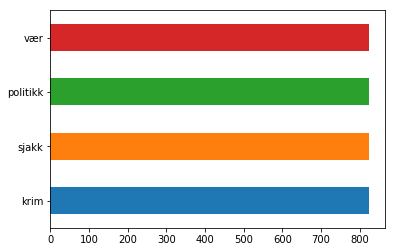

In [52]:
y_train.value_counts().plot.barh();